In [1]:
import pandas as pd
from pandas.io.json import json_normalize
import requests
from datetime import date,datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

# DataFrames

### 1 - All actors born in a specific year

In [2]:
year_of_birth=1930
dfActorsBornInYear = pd.read_json(f'http://127.0.0.1:8000/stars/by_birthyear/{year_of_birth}')
dfActorsBornInYear.set_index('id',inplace=True)
dfActorsBornInYear

,name,birthdate
id,,
273359,Abel Fernandez,1930-01-01
721031,Alejandro Rey,1930-01-01
193238,Alfie Curtis,1930-01-01
339141,Alvin Greenman,1930-01-01
665708,Angela Paton,1930-01-01
...,...,...
888845,Warren Vanders,1930-01-01
404298,Will Hutchins,1930-01-01
431499,William Joyce,1930-01-01


### 2 - Movies containing the search in their title

In [3]:
in_title="The man who"
response = requests.get(f'http://127.0.0.1:8000/movies/get_by_title?mt={in_title}')
if response.status_code == 200:
    print('Response Ok')
    dfMoviesByTitle_json = response.json()
    dfMoviesByTitle = pd.DataFrame(dfMoviesByTitle_json)
else :
    print('Error', response.status_code, response.json(), sep=', ')

dfMoviesByTitle

Response Ok


,title,year,duration,id
0,The Man Who Wasn't There,2001,116,243133
1,The Man Who Would Be King,1975,129,73341
2,The Man Who Shot Liberty Valance,1962,123,56217
3,The Man Who Knew Too Much,1956,120,49470
4,The Man Who Knew Too Much,1934,75,25452


### 3 - Statistics by actor

In [4]:
#number minimum of movies by actor (10 by default)
nb_min = 10
response = requests.get(f'http://127.0.0.1:8000/stars/stats_movie_by_actor?minc={nb_min}')
dfStatByActor = json_normalize(response.json())
dfStatByActor.set_index('actor.id',inplace=True)
dfStatByActor

,movie_count,year_first_movie,year_last_movie,actor.name,actor.birthdate
actor.id,,,,,
78,172,1926,1976,John Wayne,1907-05-26
1230,86,1915,1932,Harrison Ford,1884-03-16
125,73,1954,2012,Sean Connery,1930-08-25
230,73,1969,2019,Sylvester Stallone,1946-07-06
158,69,1980,2020,Tom Hanks,1956-07-09
...,...,...,...,...,...
915618,10,1950,1971,Patrick Wayne,1939-01-01
919798,10,1981,2019,Frank Welker,1946-01-01
936728,10,1943,1955,Grant Withers,1905-01-01


# Figures

### 1 - Movies by year

In [5]:
dfMoviesByYear = pd.read_json(f'http://127.0.0.1:8000/movies/count_by_year')
dfMoviesByYear

,year,movie_count,min_duration,max_duration,avg_duration
0,1900,1,120,120,120
1,1915,1,50,50,50
2,1916,1,50,50,50
3,1917,7,50,50,50
4,1918,10,50,60,51
...,...,...,...,...,...
102,2016,15,3,161,97
103,2017,22,3,164,95
104,2018,20,1,149,98
105,2019,28,2,209,104


Text(0.5, 1.0, 'Number of movies by year')

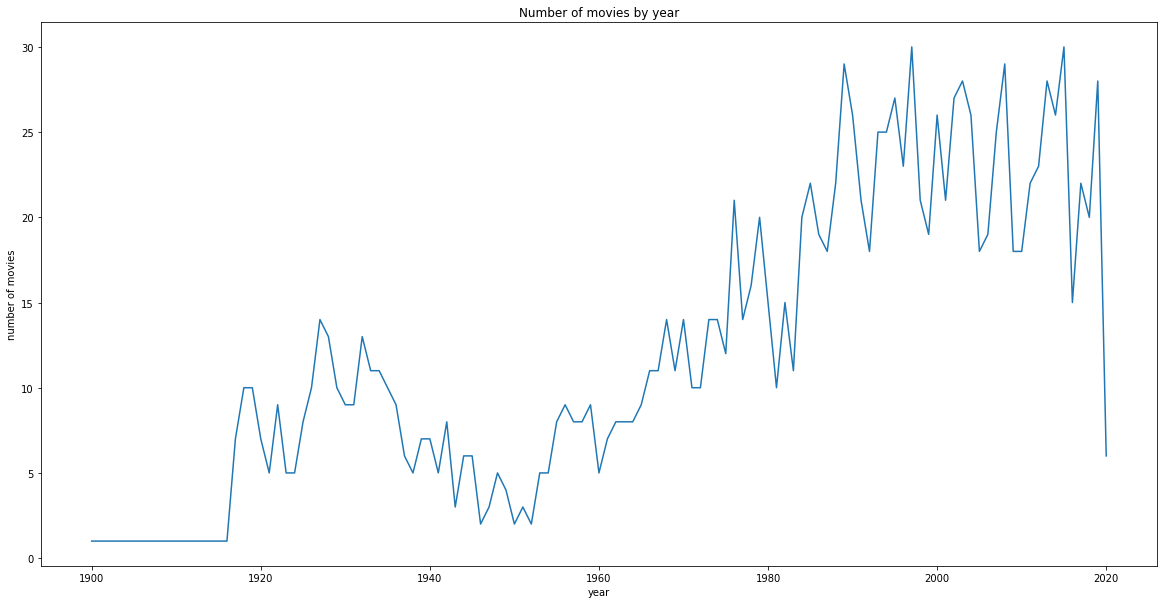

In [6]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(dfMoviesByYear["year"],dfMoviesByYear["movie_count"])
ax.set_xlabel('year')
ax.set_ylabel('number of movies')
ax.set_title('Number of movies by year')

### 2 - Actors by year

In [7]:
dfActors = pd.read_json(f'http://127.0.0.1:8000/stars?limit=50000', convert_dates=['birthdate'])
dfActors

,name,birthdate,id
0,Fred Astaire,1899-01-01,1
1,Lauren Bacall,1924-01-01,2
2,Brigitte Bardot,1934-01-01,3
3,John Belushi,NaT,4
4,Ingrid Bergman,1915-01-01,6
...,...,...,...
49196,Pam Pruitt-McGeary,NaT,11701039
49197,Joel Newsom,NaT,11722275
49198,Elizabeth Alexander,NaT,11749099
49199,Hans Van Buhofer,NaT,11749100


In [8]:
dfActorByYear = dfActors.dropna().groupby(pd.Grouper(key='birthdate', freq='Y')).count()
dfActorByYear

,name,id
birthdate,,
1846-12-31,1,1
1847-12-31,0,0
1848-12-31,2,2
1849-12-31,1,1
1850-12-31,1,1
...,...,...
2005-12-31,2,2
2006-12-31,1,1
2007-12-31,0,0


/home/eisti/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Number of birthday stars by year')

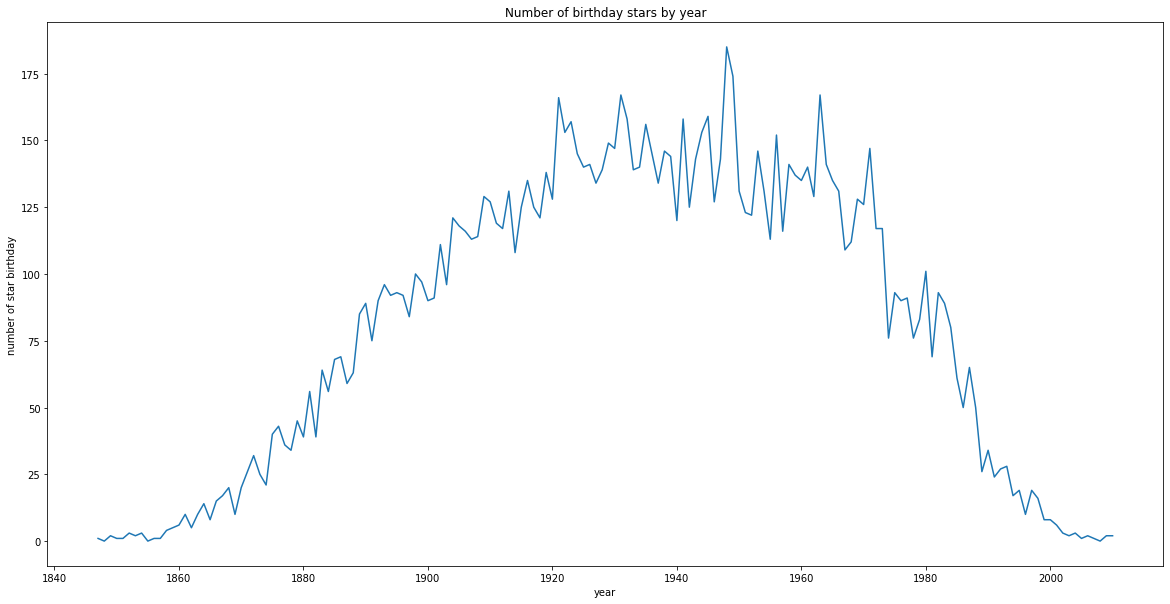

In [9]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(dfActorByYear.index, dfActorByYear.name)
ax.set_xlabel('year')
ax.set_ylabel('number of star birthday')
ax.set_title('Number of birthday stars by year')

### 3 - Top 10 actors

In [10]:
dfStatsActors = requests.get(f'http://127.0.0.1:8000/stars/stats_movie_by_actor')
dfStatsActors = json_normalize(dfStatsActors.json())
dfStatsActors = pd.DataFrame(dfStatsActors)
dfStatsActors['actor.birthdate'] = pd.to_datetime(dfStatsActors['actor.birthdate']).dt.strftime("%Y")
dfStatsActors

,movie_count,year_first_movie,year_last_movie,actor.name,actor.birthdate,actor.id
0,172,1926,1976,John Wayne,1907,78
1,86,1915,1932,Harrison Ford,1884,1230
2,73,1954,2012,Sean Connery,1930,125
3,73,1969,2019,Sylvester Stallone,1946,230
4,69,1980,2020,Tom Hanks,1956,158
...,...,...,...,...,...,...
161,10,1950,1971,Patrick Wayne,1939,915618
162,10,1981,2019,Frank Welker,1946,919798
163,10,1943,1955,Grant Withers,1905,936728
164,10,2001,2017,Michael Fassbender,1977,1055413


In [11]:
dfTop10Actors = dfStatsActors[:10]
dfTop10Actors

,movie_count,year_first_movie,year_last_movie,actor.name,actor.birthdate,actor.id
0,172,1926,1976,John Wayne,1907,78
1,86,1915,1932,Harrison Ford,1884,1230
2,73,1954,2012,Sean Connery,1930,125
3,73,1969,2019,Sylvester Stallone,1946,230
4,69,1980,2020,Tom Hanks,1956,158
5,66,1979,2019,Jean-Claude Van Damme,1960,241
6,63,1955,2018,Clint Eastwood,1930,142
7,63,1966,2020,Harrison Ford,1942,148
8,56,1970,2019,Arnold Schwarzenegger,1947,216
9,50,1988,2020,Will Smith,1968,226


Text(0.5, 1.0, 'Number of movies by actor')

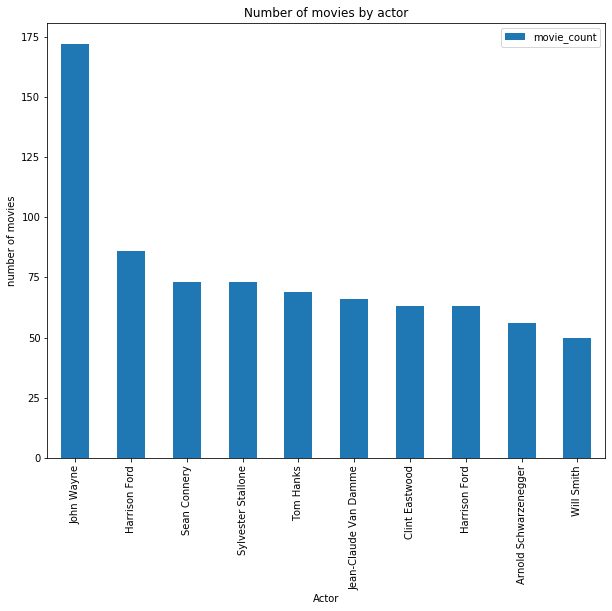

In [12]:
dfTop10ActorsMovieCount = dfTop10Actors[['actor.name', 'movie_count']].set_index('actor.name')
fig, ax = plt.subplots(figsize=(10,8))
dfTop10ActorsMovieCount.plot(kind='bar', ax=ax)
ax.set_xlabel('Actor')
ax.set_ylabel('number of movies')
ax.set_title('Number of movies by actor')

(1900, 2025)

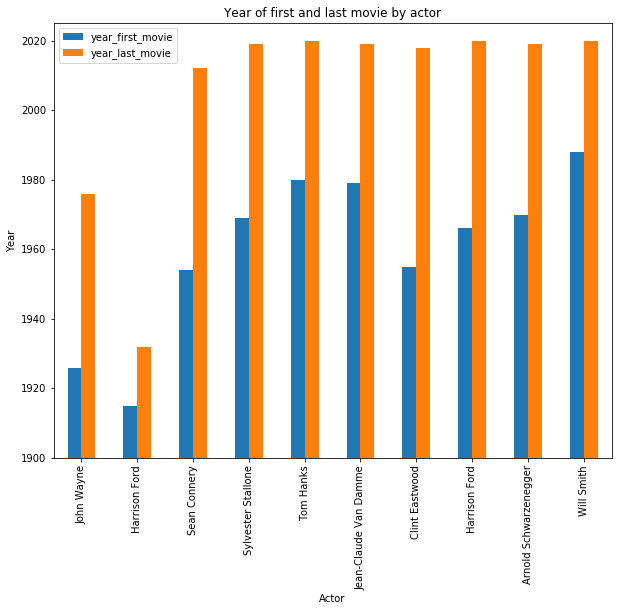

In [13]:
dfTop10ActorsYears = dfTop10Actors[['actor.name', 'year_first_movie', 'year_last_movie']].set_index('actor.name')
fig, ax = plt.subplots(figsize=(10,8))
dfTop10ActorsYears.plot(kind='bar', ax=ax)
ax.set_xlabel('Actor')
ax.set_ylabel('Year')
ax.set_title('Year of first and last movie by actor')
ax.set_ylim(1900, 2025)